In [2]:
import pandas as pd
import numpy as np
import re 
import sys
import itertools
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
%matplotlib inline

In [4]:
data = pd.read_csv('data.csv')

In [5]:
data.shape

(174389, 19)

In [6]:
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [7]:
data_w_genre = pd.read_csv('data_w_genres.csv')
data_w_genre.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7,[]


1- Danceability: Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.

2- Valence: Describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

3- Energy: Represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.

4- Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece, and derives directly from the average beat duration.

5- Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks.

6- Speechiness: This detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.

7- Instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”.

8- Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

9- Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic.
Key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

10- Mode: Indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

11- Duration: The duration of the track in milliseconds.

12- Time Signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

13- Music genre : is a conventional category that identifies some pieces of music as belonging to a shared tradition or set of conventions. It is to be distinguished from musical form and musical style, although in practice these terms are sometimes used interchangeably.

In [8]:
data_w_genre.dtypes

artists              object
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
mode                  int64
count                 int64
genres               object
dtype: object

In [9]:
data_w_genre['genres'].values[0]

"['show tunes']"

It is a string, now put i will put statement to extract the genres from string and put them in list

In [10]:
data_w_genre['genres_upd'] = data_w_genre['genres'].apply(lambda x: [re.sub(' ','_',i) for i in re.findall(r"'([^']*)'", x)])

In [11]:
data_w_genre['genres_upd'].values[0][0]

'show_tunes'

In [12]:
data['artists_upd_v1'] = data['artists'].apply(lambda x: re.findall(r"'([^']*)'", x))

In [13]:
data['artists'].values[0]

"['Mamie Smith']"

In [14]:
data['artists_upd_v1'].values[0][0]

'Mamie Smith'

In [15]:
data[data['artists_upd_v1'].apply(lambda x: not x)].head(5)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,artists_upd_v1
1,0.643,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.950,1920,[]
34,0.021,"[""The Swingin' Bachelors""]",0.559,288293,0.830,0,0bq1lNI8OPhdRQYZZSSnQk,0.146000,11,0.1870,-7.876,0,Voodoo Doll,0,1920-02-29,0.0546,107.912,0.352,1920,[]
36,0.790,"[""The Swingin' Bachelors""]",0.745,261013,0.791,0,0e0zhCKclqwgJgA7Tjg2ca,0.000000,7,0.1020,-8.584,1,Penticton Kitty,0,1920-02-29,0.0595,120.169,0.658,1920,[]
46,0.147,"[""The Swingin' Bachelors""]",0.603,235547,0.719,0,0xKe1lGyWBuk3lx3JIUUUx,0.000000,0,0.1110,-5.464,0,Cloud 9,0,1920-02-29,0.0271,92.010,0.697,1920,[]
47,0.367,"[""The Swingin' Bachelors""]",0.716,264240,0.836,0,11rj3RWlVnnxW0EL7jwN8R,0.000006,9,0.1910,-6.099,1,Big Jim and the Twins,0,1920-02-29,0.0451,105.986,0.635,1920,[]


this did not work in all conditions

In [16]:
data['artists_upd_v2'] = data['artists'].apply(lambda x: re.findall('\"(.*?)\"',x))
data['artists_upd'] = np.where(data['artists_upd_v1'].apply(lambda x: not x), data['artists_upd_v2'], data['artists_upd_v1'] )

In [17]:
data['artists_song'] = data.apply(lambda row: row['artists_upd'][0]+row['name'],axis = 1)
data.sort_values(['artists_song','release_date'], ascending = False, inplace = True)
data[data['name']=='You'].head(5)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,popularity,release_date,speechiness,tempo,valence,year,artists_upd_v1,artists_upd_v2,artists_upd,artists_song
82882,0.811,['The Aquatones'],0.236,119480,0.617,0,5gjrrteftTnx1yxH0FXVXS,0.0000,10,0.2050,...,24,1965-06-14,0.0362,115.607,0.297,1965,[The Aquatones],[],[The Aquatones],The AquatonesYou
153137,0.426,['Ten Sharp'],0.405,272984,0.901,0,01AfqEDao4dHz4bjpTVgsz,0.0185,11,0.1880,...,54,1991-04-13,0.0315,174.041,0.666,1991,[Ten Sharp],[],[Ten Sharp],Ten SharpYou
88220,0.426,['Ten Sharp'],0.405,272984,0.901,0,6lbme14HiDWYmGiw1I2Dv6,0.0185,11,0.1880,...,61,1991,0.0315,174.041,0.666,1991,[Ten Sharp],[],[Ten Sharp],Ten SharpYou
72058,0.691,['Switchfoot'],0.508,253440,0.407,0,1nJRA4gUMLi0PFeLQAoim3,0.5590,0,0.1340,...,47,1997-01-01,0.0285,147.880,0.285,1997,[Switchfoot],[],[Switchfoot],SwitchfootYou
108778,0.318,['Romeo Santos'],0.725,248813,0.625,0,1sQrCwV8vvtYLqa0KQlwE9,0.0000,9,0.0825,...,62,2012-08-27,0.0741,132.108,0.845,2012,[Romeo Santos],[],[Romeo Santos],Romeo SantosYou


In [18]:
data.drop_duplicates('artists_song',inplace = True)
data[data['name']=='You'].head(5)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,popularity,release_date,speechiness,tempo,valence,year,artists_upd_v1,artists_upd_v2,artists_upd,artists_song
82882,0.811,['The Aquatones'],0.236,119480,0.617,0,5gjrrteftTnx1yxH0FXVXS,0.0000,10,0.2050,...,24,1965-06-14,0.0362,115.607,0.297,1965,[The Aquatones],[],[The Aquatones],The AquatonesYou
153137,0.426,['Ten Sharp'],0.405,272984,0.901,0,01AfqEDao4dHz4bjpTVgsz,0.0185,11,0.1880,...,54,1991-04-13,0.0315,174.041,0.666,1991,[Ten Sharp],[],[Ten Sharp],Ten SharpYou
72058,0.691,['Switchfoot'],0.508,253440,0.407,0,1nJRA4gUMLi0PFeLQAoim3,0.5590,0,0.1340,...,47,1997-01-01,0.0285,147.880,0.285,1997,[Switchfoot],[],[Switchfoot],SwitchfootYou
108778,0.318,['Romeo Santos'],0.725,248813,0.625,0,1sQrCwV8vvtYLqa0KQlwE9,0.0000,9,0.0825,...,62,2012-08-27,0.0741,132.108,0.845,2012,[Romeo Santos],[],[Romeo Santos],Romeo SantosYou
155629,0.429,['Raheem DeVaughn'],0.777,302187,0.654,0,4RMIDsxooqjhLIkxhlWzLa,0.0000,2,0.1050,...,45,2005,0.0336,124.009,0.515,2005,[Raheem DeVaughn],[],[Raheem DeVaughn],Raheem DeVaughnYou


In [19]:
artists_exploded = data[['artists_upd','id']].explode('artists_upd')
artists_exploded_enriched = artists_exploded.merge(data_w_genre, how = 'left', left_on = 'artists_upd',right_on = 'artists')
artists_exploded_enriched_nonnull = artists_exploded_enriched[~artists_exploded_enriched.genres_upd.isnull()]

In [20]:
artists_exploded_enriched_nonnull[artists_exploded_enriched_nonnull['id'] =='1sQrCwV8vvtYLqa0KQlwE9']

,artists_upd,id,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres,genres_upd
52379,Romeo Santos,1sQrCwV8vvtYLqa0KQlwE9,Romeo Santos,0.373594,0.767319,237806.914894,0.715787,2.859574e-07,0.171721,-4.958702,0.058851,120.818936,0.768681,67.617021,5.0,0.0,47.0,"['bachata', 'latin', 'tropical']","[bachata, latin, tropical]"


In [21]:
artists_genres_consolidated = artists_exploded_enriched_nonnull.groupby('id')['genres_upd'].apply(list).reset_index()

In [22]:
artists_genres_consolidated['consolidates_genre_lists'] = artists_genres_consolidated['genres_upd'].apply(lambda x: list(set(list(itertools.chain.from_iterable(x)))))

In [23]:
artists_genres_consolidated.head()

,id,genres_upd,consolidates_genre_lists
0,000G1xMMuwxNHmwVsBdtj1,"[[candy_pop, dance_rock, new_wave, new_wave_po...","[candy_pop, rock, permanent_wave, new_wave_pop..."
1,000Npgk5e2SgwGaIsN3ztv,"[[classic_bollywood, classic_pakistani_pop, fi...","[ghazal, filmi, classic_pakistani_pop, sufi, c..."
2,000ZxLGm7jDlWCHtcXSeBe,"[[boogie-woogie, piano_blues, stride]]","[stride, piano_blues, boogie-woogie]"
3,000jBcNljWTnyjB4YO7ojf,[[bomba_y_plena]],[bomba_y_plena]
4,000mGrJNc2GAgQdMESdgEc,"[[classical, french_romanticism, late_romantic...","[french_romanticism, late_romantic_era, histor..."


In [24]:
data = data.merge(artists_genres_consolidated[['id','consolidates_genre_lists']], on = 'id',how = 'left')

In [25]:
data.tail()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,release_date,speechiness,tempo,valence,year,artists_upd_v1,artists_upd_v2,artists_upd,artists_song,consolidates_genre_lists
158279,0.0248,"[""Lil' Flip"", 'Lea']",0.814,225173,0.3870,1,4s0o8TJHfX9LLHa0umnOzT,0.000000,0,0.131,...,2004-03-30,0.0945,93.961,0.792,2004,"[ Flip"", ]",[Lil' Flip],"[ Flip"", ]","Flip"", Sunshine (feat. Lea)",NaN
158280,0.0249,"[""World Class Wreckin' Cru"", ""Michel 'Le""]",0.715,351040,0.4900,0,3hoiinUc5VA9xUEJID7R8V,0.000170,9,0.139,...,1994-04-06,0.0479,129.309,0.429,1994,"[ Cru"", ""Michel ]","[World Class Wreckin' Cru, Michel 'Le]","[ Cru"", ""Michel ]","Cru"", ""Michel Turn Off The Lights - Rap",NaN
158281,0.9940,"[""Vienna Boys' Choir"", 'Uwe Christian Harrer']",0.317,98000,0.0543,0,7GaUNnAdIMXrvYG7673QIK,0.027700,10,0.168,...,1996-01-01,0.0777,81.111,0.290,1996,"[ Choir"", ]",[Vienna Boys' Choir],"[ Choir"", ]","Choir"", O Tannenbaum",NaN
158282,0.0421,"[""Rappin' 4-Tay"", 'Herm']",0.893,232267,0.5770,0,0CHKRuAjf8LvCL6SxCnq7V,0.000177,7,0.119,...,1999-09-17,0.1850,93.000,0.572,1999,"[ 4-Tay"", ]",[Rappin' 4-Tay],"[ 4-Tay"", ]","4-Tay"", Playa of the Year",NaN
158283,0.0113,"[""Rappin' 4-Tay"", 'MC Breed', 'Too $hort']",0.897,337973,0.4140,1,78859Af0fmA9VTlgnOHTAP,0.000110,4,0.101,...,1996,0.2460,96.039,0.273,1996,"[ 4-Tay"", , , ]",[Rappin' 4-Tay],"[ 4-Tay"", , , ]","4-Tay"", Never Talk Down",NaN


In [26]:
data['year'] = data['release_date'].apply(lambda x: x.split('-')[0])

In [27]:
data.shape

(158284, 24)

In [28]:
music = data[data['popularity'] >=1]

In [29]:
data=music[115000:]

In [30]:
data.shape

(6610, 24)

In [31]:
float_cols = data.dtypes[data.dtypes == 'float64'].index.values

In [32]:
ohe_cols = 'popularity'

In [33]:
data['popularity'].describe()

count    6610.000000
mean       34.843722
std        19.648329
min         1.000000
25%        20.000000
50%        35.000000
75%        49.000000
max        96.000000
Name: popularity, dtype: float64

Text(0.5, 1.0, 'Popularity Based on acousticness')

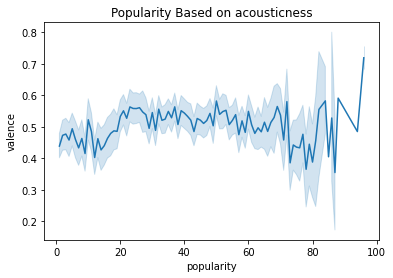

In [34]:
sns.lineplot(y = 'valence', x = 'popularity', data = data)
plt.title('Popularity Based on acousticness')

In [35]:
data['popularity_red'] = data['popularity'].apply(lambda x: int(x/5))

In [36]:
data['consolidates_genre_lists'] = data['consolidates_genre_lists'].apply(lambda d: d if isinstance(d, list) else [])
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,speechiness,tempo,valence,year,artists_upd_v1,artists_upd_v2,artists_upd,artists_song,consolidates_genre_lists,popularity_red
149765,0.971,['Arthur Lyman'],0.450,127547,0.0176,0,7LHRYEfSqWfJqvLA9G8qvQ,0.8030,0,0.0862,...,0.0544,102.818,0.265,1958,[Arthur Lyman],[],[Arthur Lyman],Arthur LymanMapuana,"[lounge, exotica, jazz_vibraphone, easy_listen...",3
149766,0.443,['Arthur Lyman'],0.466,181293,0.3280,0,13aix4rQDKkOsbdas3x2f0,0.0599,5,0.2130,...,0.0390,75.797,0.374,1958,[Arthur Lyman],[],[Arthur Lyman],Arthur LymanLove for Sale,"[lounge, exotica, jazz_vibraphone, easy_listen...",1
149767,0.199,['Arthur Lyman'],0.638,150933,0.2610,0,2KclLhvHqgnYX3vhikhM96,0.0615,2,0.0726,...,0.0846,131.356,0.355,1958,[Arthur Lyman],[],[Arthur Lyman],Arthur LymanLove Dance,"[lounge, exotica, jazz_vibraphone, easy_listen...",1
149768,0.670,['Arthur Lyman'],0.558,141080,0.9460,0,3xUwZTf6rFZJLS3b2p15xP,0.5720,5,0.0475,...,0.0397,172.351,0.833,1953,[Arthur Lyman],[],[Arthur Lyman],Arthur LymanLittle Drummer Boy,"[lounge, exotica, jazz_vibraphone, easy_listen...",2
149769,0.913,['Arthur Lyman'],0.645,150560,0.2230,0,5yx7pJsb2g10DY3fNJhq9L,0.0981,0,0.1050,...,0.0451,111.156,0.407,1958,[Arthur Lyman],[],[Arthur Lyman],Arthur LymanLa Paloma,"[lounge, exotica, jazz_vibraphone, easy_listen...",1


In [37]:
data=data.drop(['acousticness','artists','artists_song','release_date','artists_upd','popularity_red','artists_upd_v2','artists_upd_v1','danceability','duration_ms','explicit','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','valence'],axis='columns')
data.head()

,id,name,popularity,year,consolidates_genre_lists
149765,7LHRYEfSqWfJqvLA9G8qvQ,Mapuana,16,1958,"[lounge, exotica, jazz_vibraphone, easy_listen..."
149766,13aix4rQDKkOsbdas3x2f0,Love for Sale,7,1958,"[lounge, exotica, jazz_vibraphone, easy_listen..."
149767,2KclLhvHqgnYX3vhikhM96,Love Dance,6,1958,"[lounge, exotica, jazz_vibraphone, easy_listen..."
149768,3xUwZTf6rFZJLS3b2p15xP,Little Drummer Boy,11,1953,"[lounge, exotica, jazz_vibraphone, easy_listen..."
149769,5yx7pJsb2g10DY3fNJhq9L,La Paloma,9,1958,"[lounge, exotica, jazz_vibraphone, easy_listen..."


In [38]:
data.to_excel("final_data.xlsx")

Content based recommendation 

In [39]:
data['name'].unique()

array(['Mapuana', 'Love for Sale', 'Love Dance', ...,
       'Sunshine (feat. Lea)', 'Turn Off The Lights - Rap',
       'Never Talk Down'], dtype=object)

In [40]:
data['consolidates_genre_lists'].head()

149765    [lounge, exotica, jazz_vibraphone, easy_listen...
149766    [lounge, exotica, jazz_vibraphone, easy_listen...
149767    [lounge, exotica, jazz_vibraphone, easy_listen...
149768    [lounge, exotica, jazz_vibraphone, easy_listen...
149769    [lounge, exotica, jazz_vibraphone, easy_listen...
Name: consolidates_genre_lists, dtype: object

In [41]:
def create_feature_set(df):
    tfidf = TfidfVectorizer()
    tfidf_matrix =  tfidf.fit_transform(df['consolidates_genre_lists'].apply(lambda x: " ".join(x)))
    genre_df = pd.DataFrame(tfidf_matrix.toarray())
    genre_df.columns = ['genre' + "|" + i for i in tfidf.get_feature_names()]
    genre_df.reset_index(drop = True, inplace=True)
    final = pd.concat([genre_df])
    final['year']=df['year'].values
    return final

In [42]:
count_matrix = create_feature_set(data)

In [43]:
count_matrix.head()

,genre|_hip_hop,genre|a_cappella,genre|abstract_hip_hop,genre|acid_house,genre|acid_rock,genre|acid_techno,genre|acoustic_pop,genre|acoustic_punk,genre|adult_standards,genre|afghan_pop,...,genre|world,genre|world_fusion,genre|world_worship,genre|worship,genre|wrestling,genre|wu_fam,genre|yacht_rock,genre|ye_ye,genre|youth_orchestra,year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1958
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1958
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1958
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1953
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1958


In [44]:
count_matrix.shape

(6610, 1163)

In [45]:
count_matrix.dtypes

genre|_hip_hop            float64
genre|a_cappella          float64
genre|abstract_hip_hop    float64
genre|acid_house          float64
genre|acid_rock           float64
                           ...   
genre|wu_fam              float64
genre|yacht_rock          float64
genre|ye_ye               float64
genre|youth_orchestra     float64
year                       object
Length: 1163, dtype: object

In [46]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(count_matrix, count_matrix)

MemoryError: Unable to allocate 58.6 MiB for an array with shape (1162, 6610) and data type object

In [ ]:
# Reset index of your main DataFrame and construct reverse mapping as before
data = data.reset_index()
indices = pd.Series(data.index, index=data['name'])

In [ ]:

def get_recommendations(name, cosine_sim = cosine_sim):
    idx = indices[name]  
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    song_indices = [i[0] for i in sim_scores]
    cosine_sim = data.iloc[song_indices][['name','popularity']]
    return cosine_sim.sort_values('popularity', ascending = False)

In [ ]:
get_recommendations("Love Dance")